In [31]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

In [32]:
pima = pd.read_csv('Data/diabetes.csv', sep=';')
df = pd.read_csv('Data/diabetes_pt1.csv', sep=';')
df_test = pd.read_csv('Data/diabetes_pt2.csv', sep=';')

/tmp/ipykernel_9756/332813748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Outcome', data=pima, palette="Set2")


Text(0, 0.5, 'Number of People')

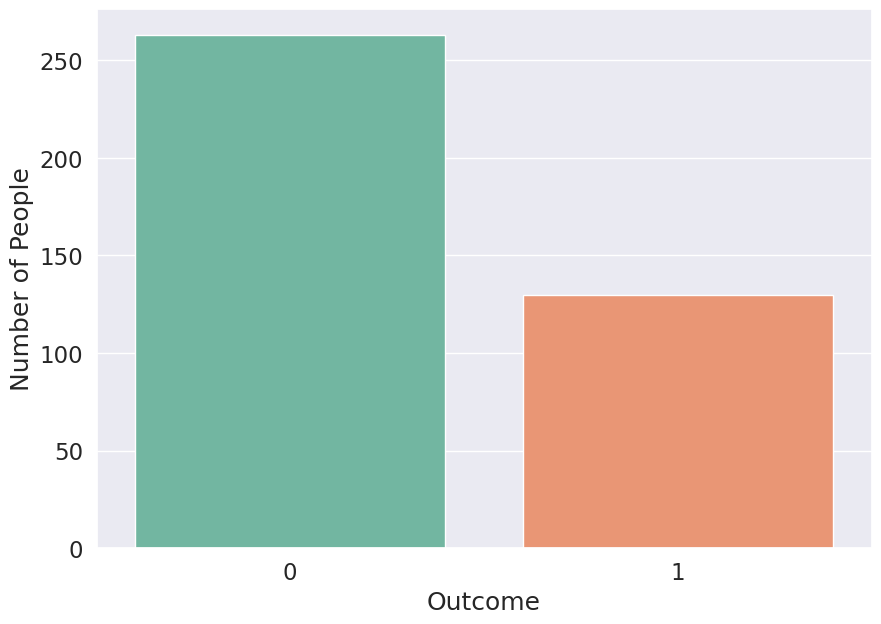

In [33]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Outcome', data=pima, palette="Set2")
plt.ylabel('Number of People')

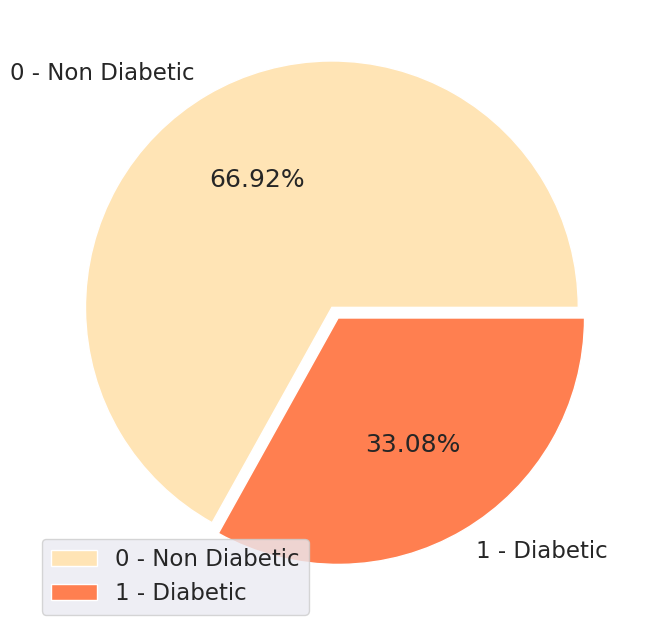

In [34]:
plt.figure(figsize=(8,8))
pieC = pima['Outcome'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['0 - Non Diabetic', '1 - Diabetic']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('0 - Non Diabetic', '1 - Diabetic'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

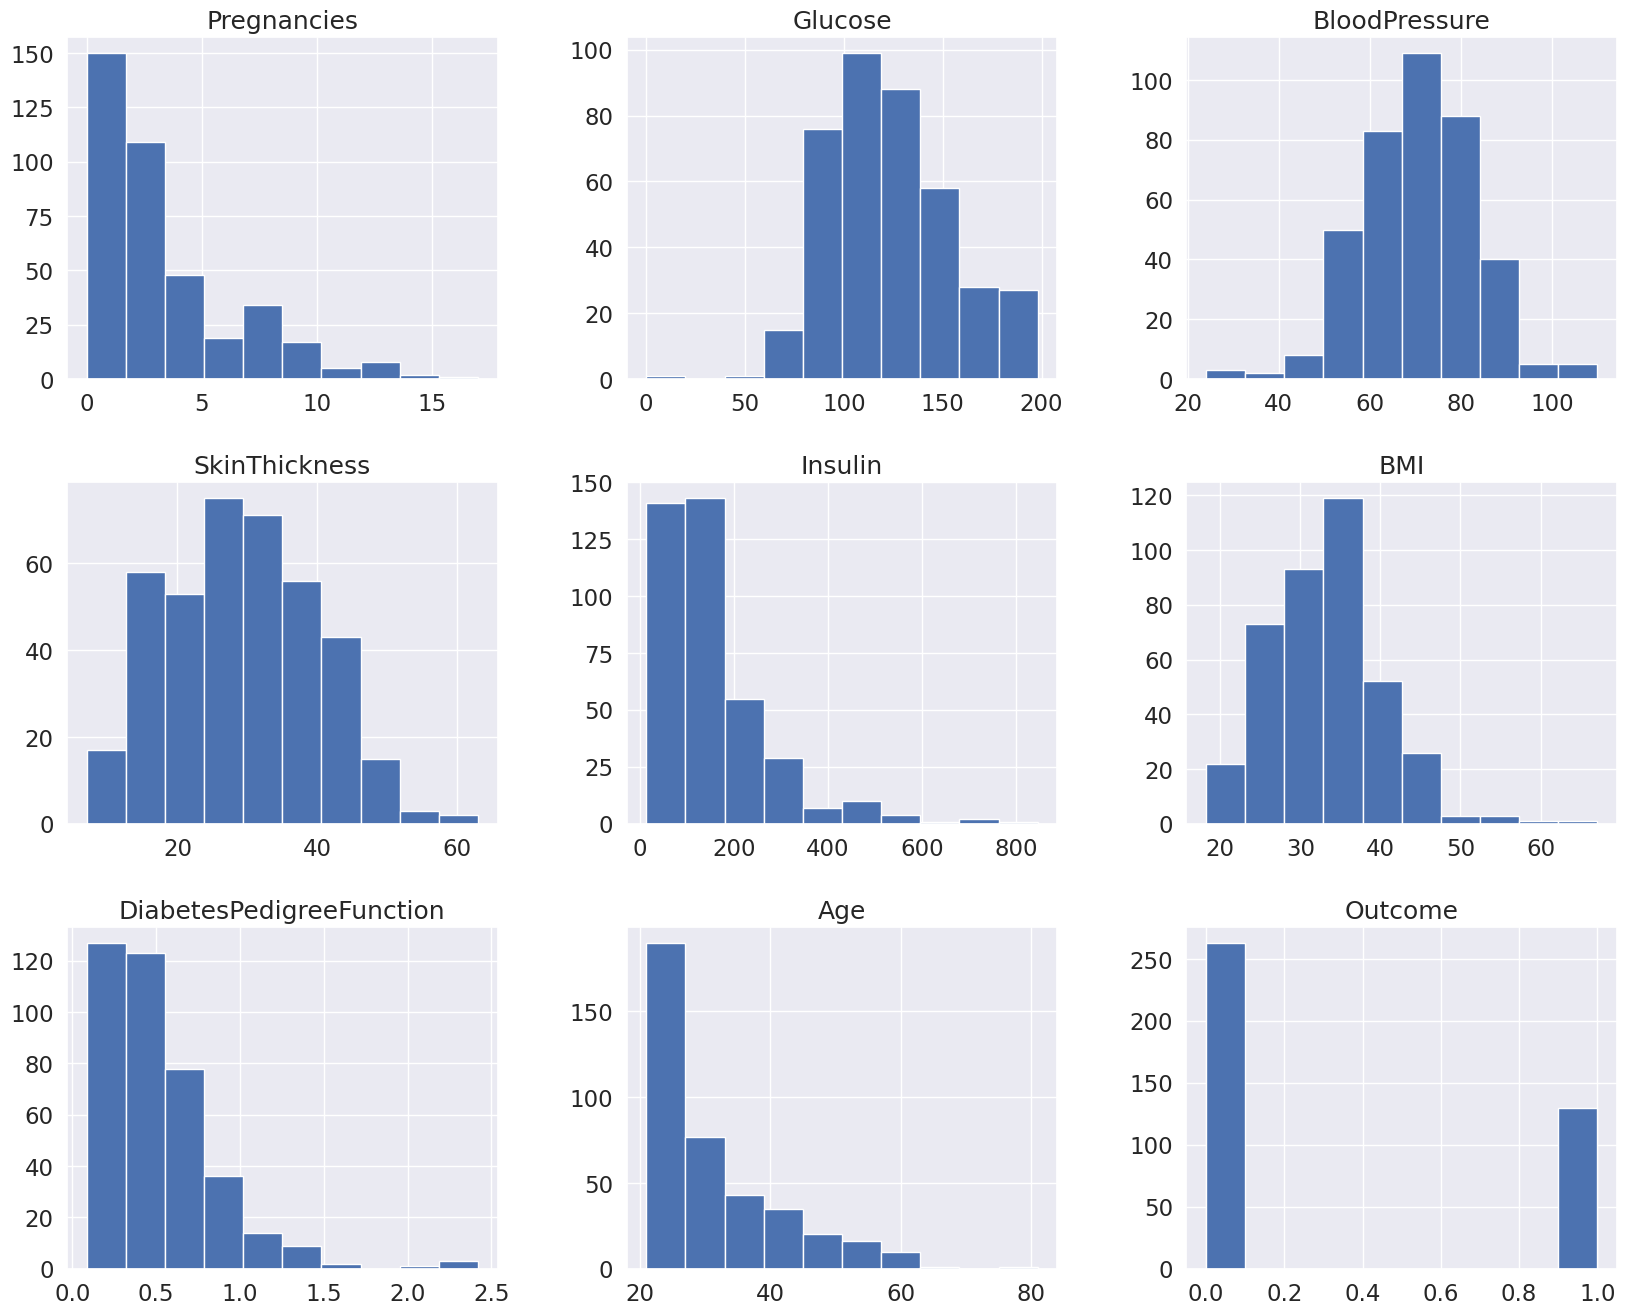

In [35]:
pima.hist(figsize = (20,16),grid=True)

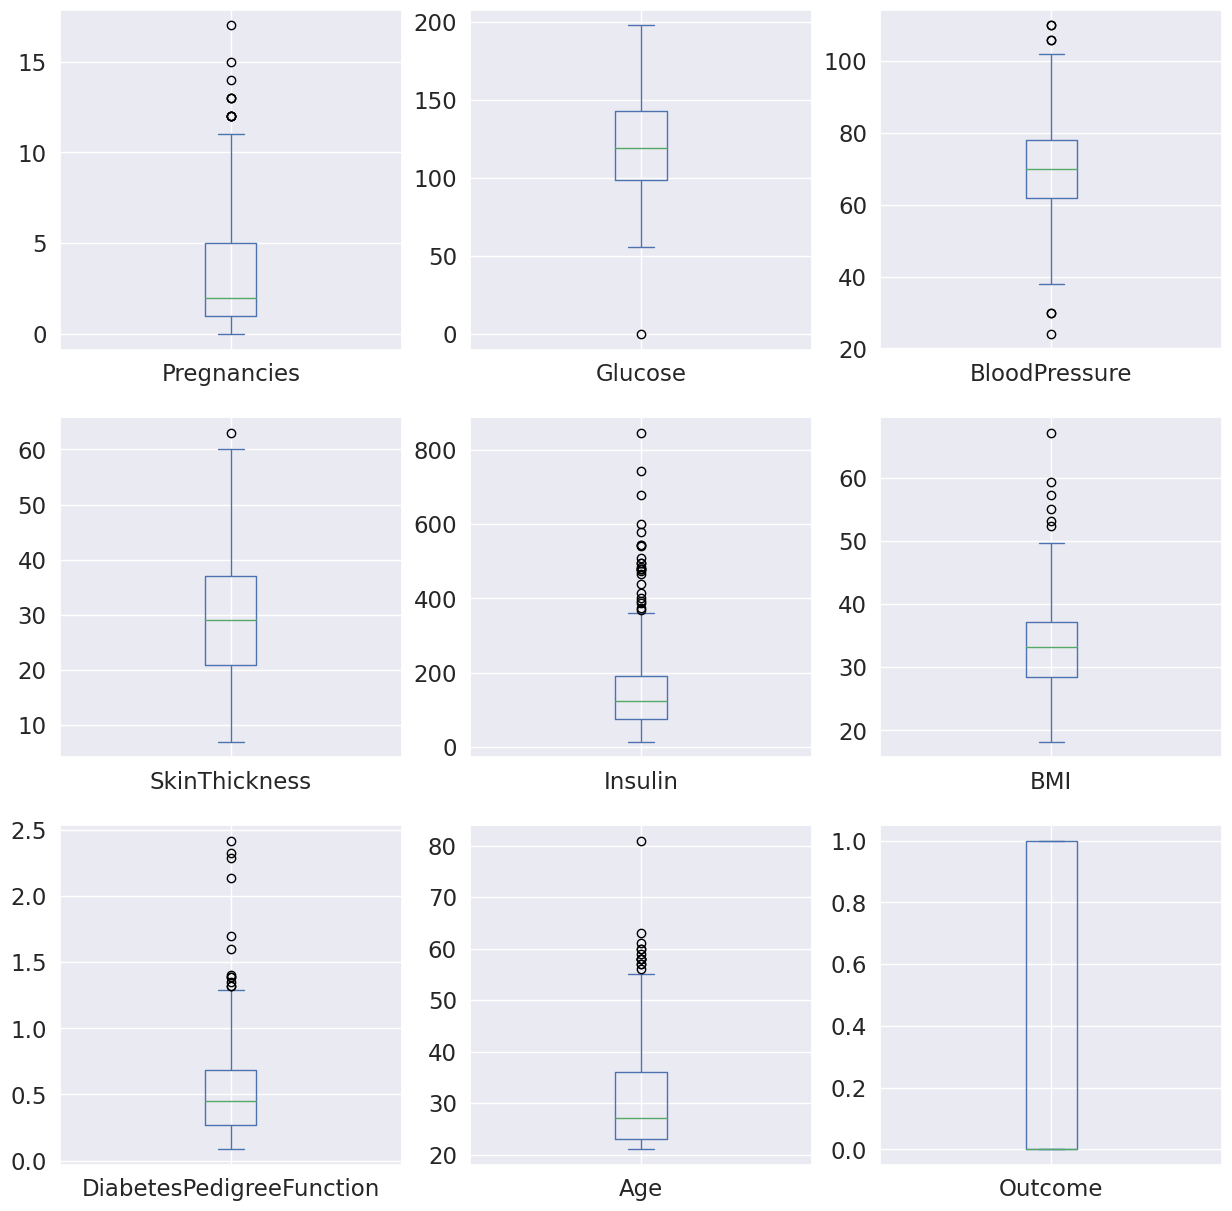

In [36]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

In [37]:
# plt.figure(figsize=(15,6))
# sns.set(font_scale = 1.5)
# sns.countplot(pima['Pregnancies'])
# plt.ylabel('Number of People')

/tmp/ipykernel_9756/2277464663.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pima.Glucose, ax = ax[0,0], color = 'orange')
/tmp/ipykernel_9756/2277464663.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pima.Pregnancies, ax = ax[0,1], color = 'red')
/tmp/ipykernel_9756/2277464663.py:5: 

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

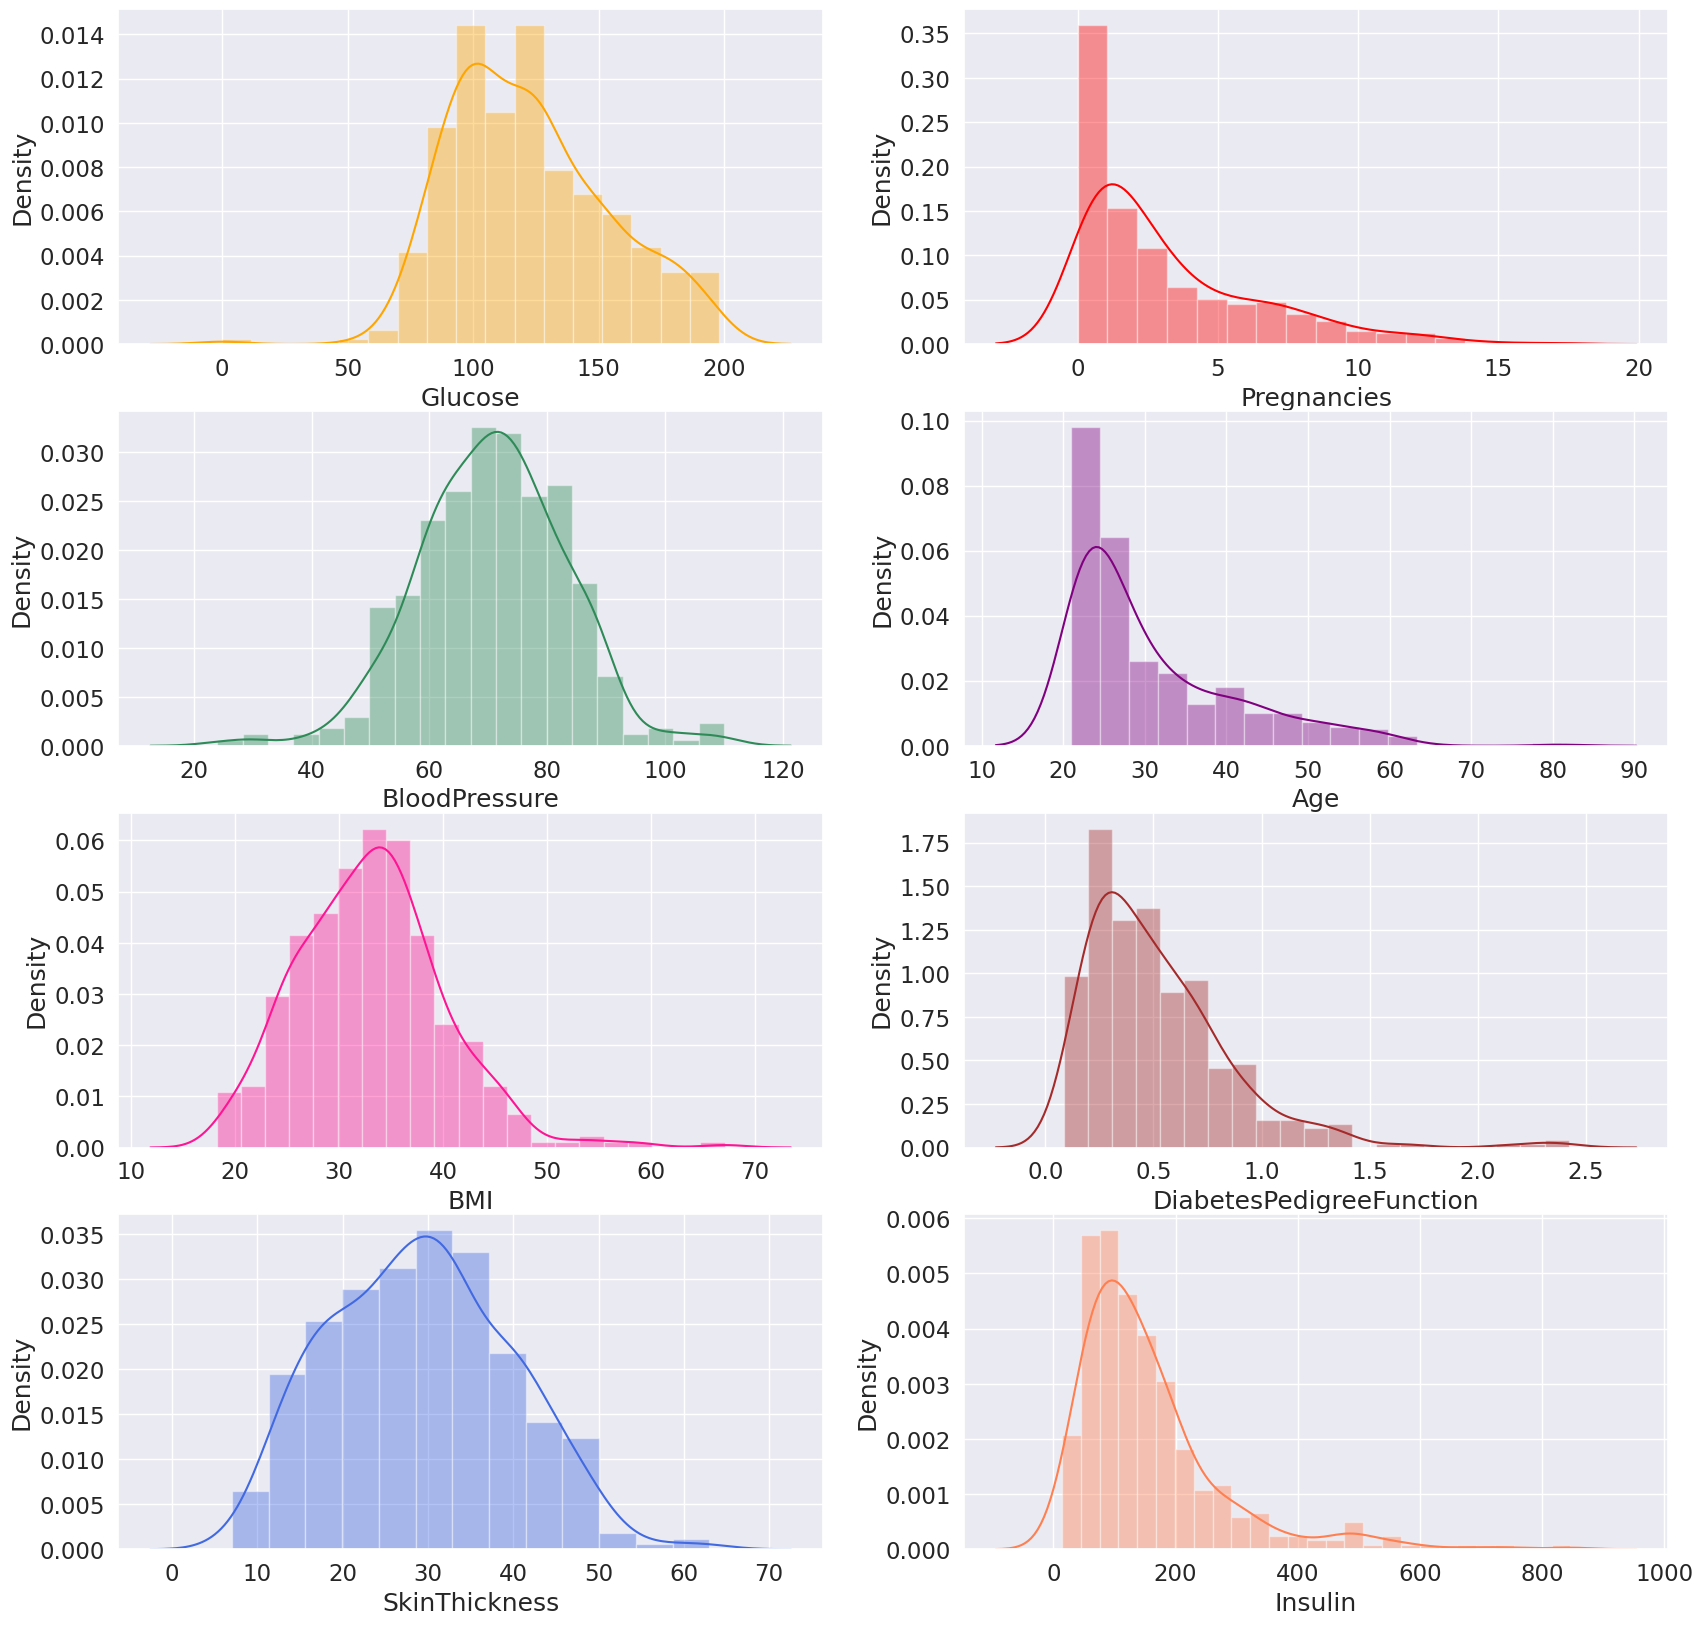

In [38]:
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.set(font_scale = 1)
sns.distplot(pima.Glucose, ax = ax[0,0], color = 'orange')
sns.distplot(pima.Pregnancies, ax = ax[0,1], color = 'red')
sns.distplot(pima.BloodPressure, ax = ax[1,0], color = 'seagreen')
sns.distplot(pima.Age, ax = ax[1,1], color = 'purple')
sns.distplot(pima.BMI, ax = ax[2,0], color = 'deeppink')
sns.distplot(pima.DiabetesPedigreeFunction, ax = ax[2,1], color = 'brown')
sns.distplot(pima.SkinThickness, ax = ax[3,0], color = 'royalblue')
sns.distplot(pima.Insulin, ax = ax[3,1], color = 'coral')

<AxesSubplot:>

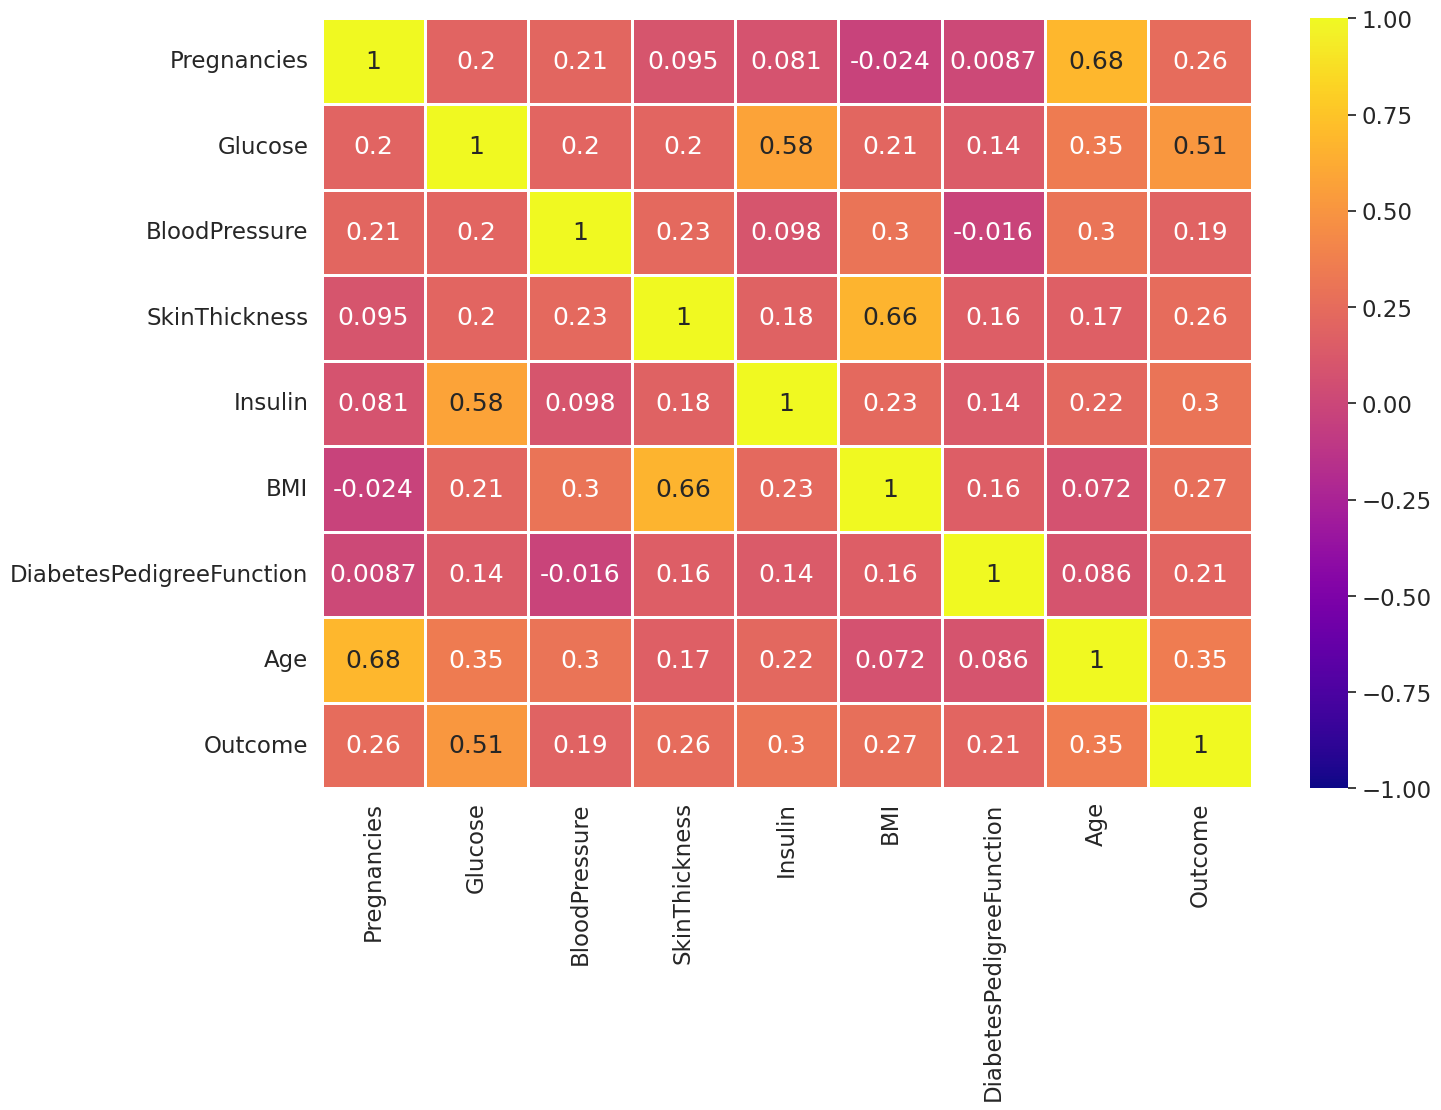

In [39]:
corr = pima.corr()
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

Jakieś moje dziwne próby to jest raczej źle bo muszę zrobić prior predictive check tu jest za duzo tego

In [40]:
with open('Stan/population_0.stan', 'r') as f: 

   print(f.read())

model_ppc=CmdStanModel(stan_file='Stan/population_0.stan')

R = 1000
sim_data = model_ppc.sample(data={'N': 1000},
                        iter_sampling=393, 
                        iter_warmup=1,
                        refresh=R,
                        fixed_param=True,
                        chains=1)

# Pobranie wyników
whot = sim_data.draws_pd()
print(whot[['glucose', 'age', 'bmi']].head())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


data {
  int<lower=0> N;  // liczba symulacji
}

generated quantities {
  real glucose = normal_rng(110, 25);
  real age_base = 21;  // Wiek zaczyna się od 21 lat
  real lambda_age = 0.1;  // Parametr lambda dla rozkładu wykładniczego
  real age = age_base + exponential_rng(lambda_age);  // Wiek z rozkładu wykładniczego, przesunięty o bazowy wiek 21 lat
  real bmi = normal_rng(33, 6);
  real blood_pressure = normal_rng(75, 12);
  real pregnancies = exponential_rng(0.283);
  real insulin = normal_rng(130, 70);
  real<lower=0> dpf = normal_rng(0.35, 0.32);
  //real pregnancies = poisson_rng(1.5);
}


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



    glucose      age      bmi
0  136.2410  28.1993  23.8791
1  153.4890  40.9115  28.8118
2  122.2660  42.8646  32.4869
3  132.3860  24.9716  38.0308
4   71.6313  24.3940  34.6022


In [41]:
print(whot)

     lp__  accept_stat__   glucose  age_base  lambda_age      age      bmi  \
0     0.0            0.0  136.2410      21.0         0.1  28.1993  23.8791   
1     0.0            0.0  153.4890      21.0         0.1  40.9115  28.8118   
2     0.0            0.0  122.2660      21.0         0.1  42.8646  32.4869   
3     0.0            0.0  132.3860      21.0         0.1  24.9716  38.0308   
4     0.0            0.0   71.6313      21.0         0.1  24.3940  34.6022   
..    ...            ...       ...       ...         ...      ...      ...   
388   0.0            0.0  102.8390      21.0         0.1  22.4751  30.7773   
389   0.0            0.0  122.6420      21.0         0.1  43.2630  37.4046   
390   0.0            0.0       NaN       NaN         NaN      NaN      NaN   
391   0.0            0.0   90.1583      21.0         0.1  46.9933  32.1974   
392   0.0            0.0   94.3476      21.0         0.1  30.3865  31.8196   

     blood_pressure  pregnancies    insulin       dpf  
0      

In [42]:
print(pima)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       89             66             23       94  28.1   
1              0      137             40             35      168  43.1   
2              3       78             50             32       88  31.0   
3              2      197             70             45      543  30.5   
4              1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
388            0      181             88             44      510  43.3   
389            1      128             88             39      110  36.5   
390            2       88             58             26       16  28.4   
391           10      101             76             48      180  32.9   
392            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.167   21        0  
1                  

In [43]:
print("Average number of children had by Pima woman: ", pima['Pregnancies'].mean())
print("Average insulin of Pima woman: ", pima['Insulin'].mean())

Average number of children had by Pima woman:  3.295165394402036
Average insulin of Pima woman:  155.7175572519084


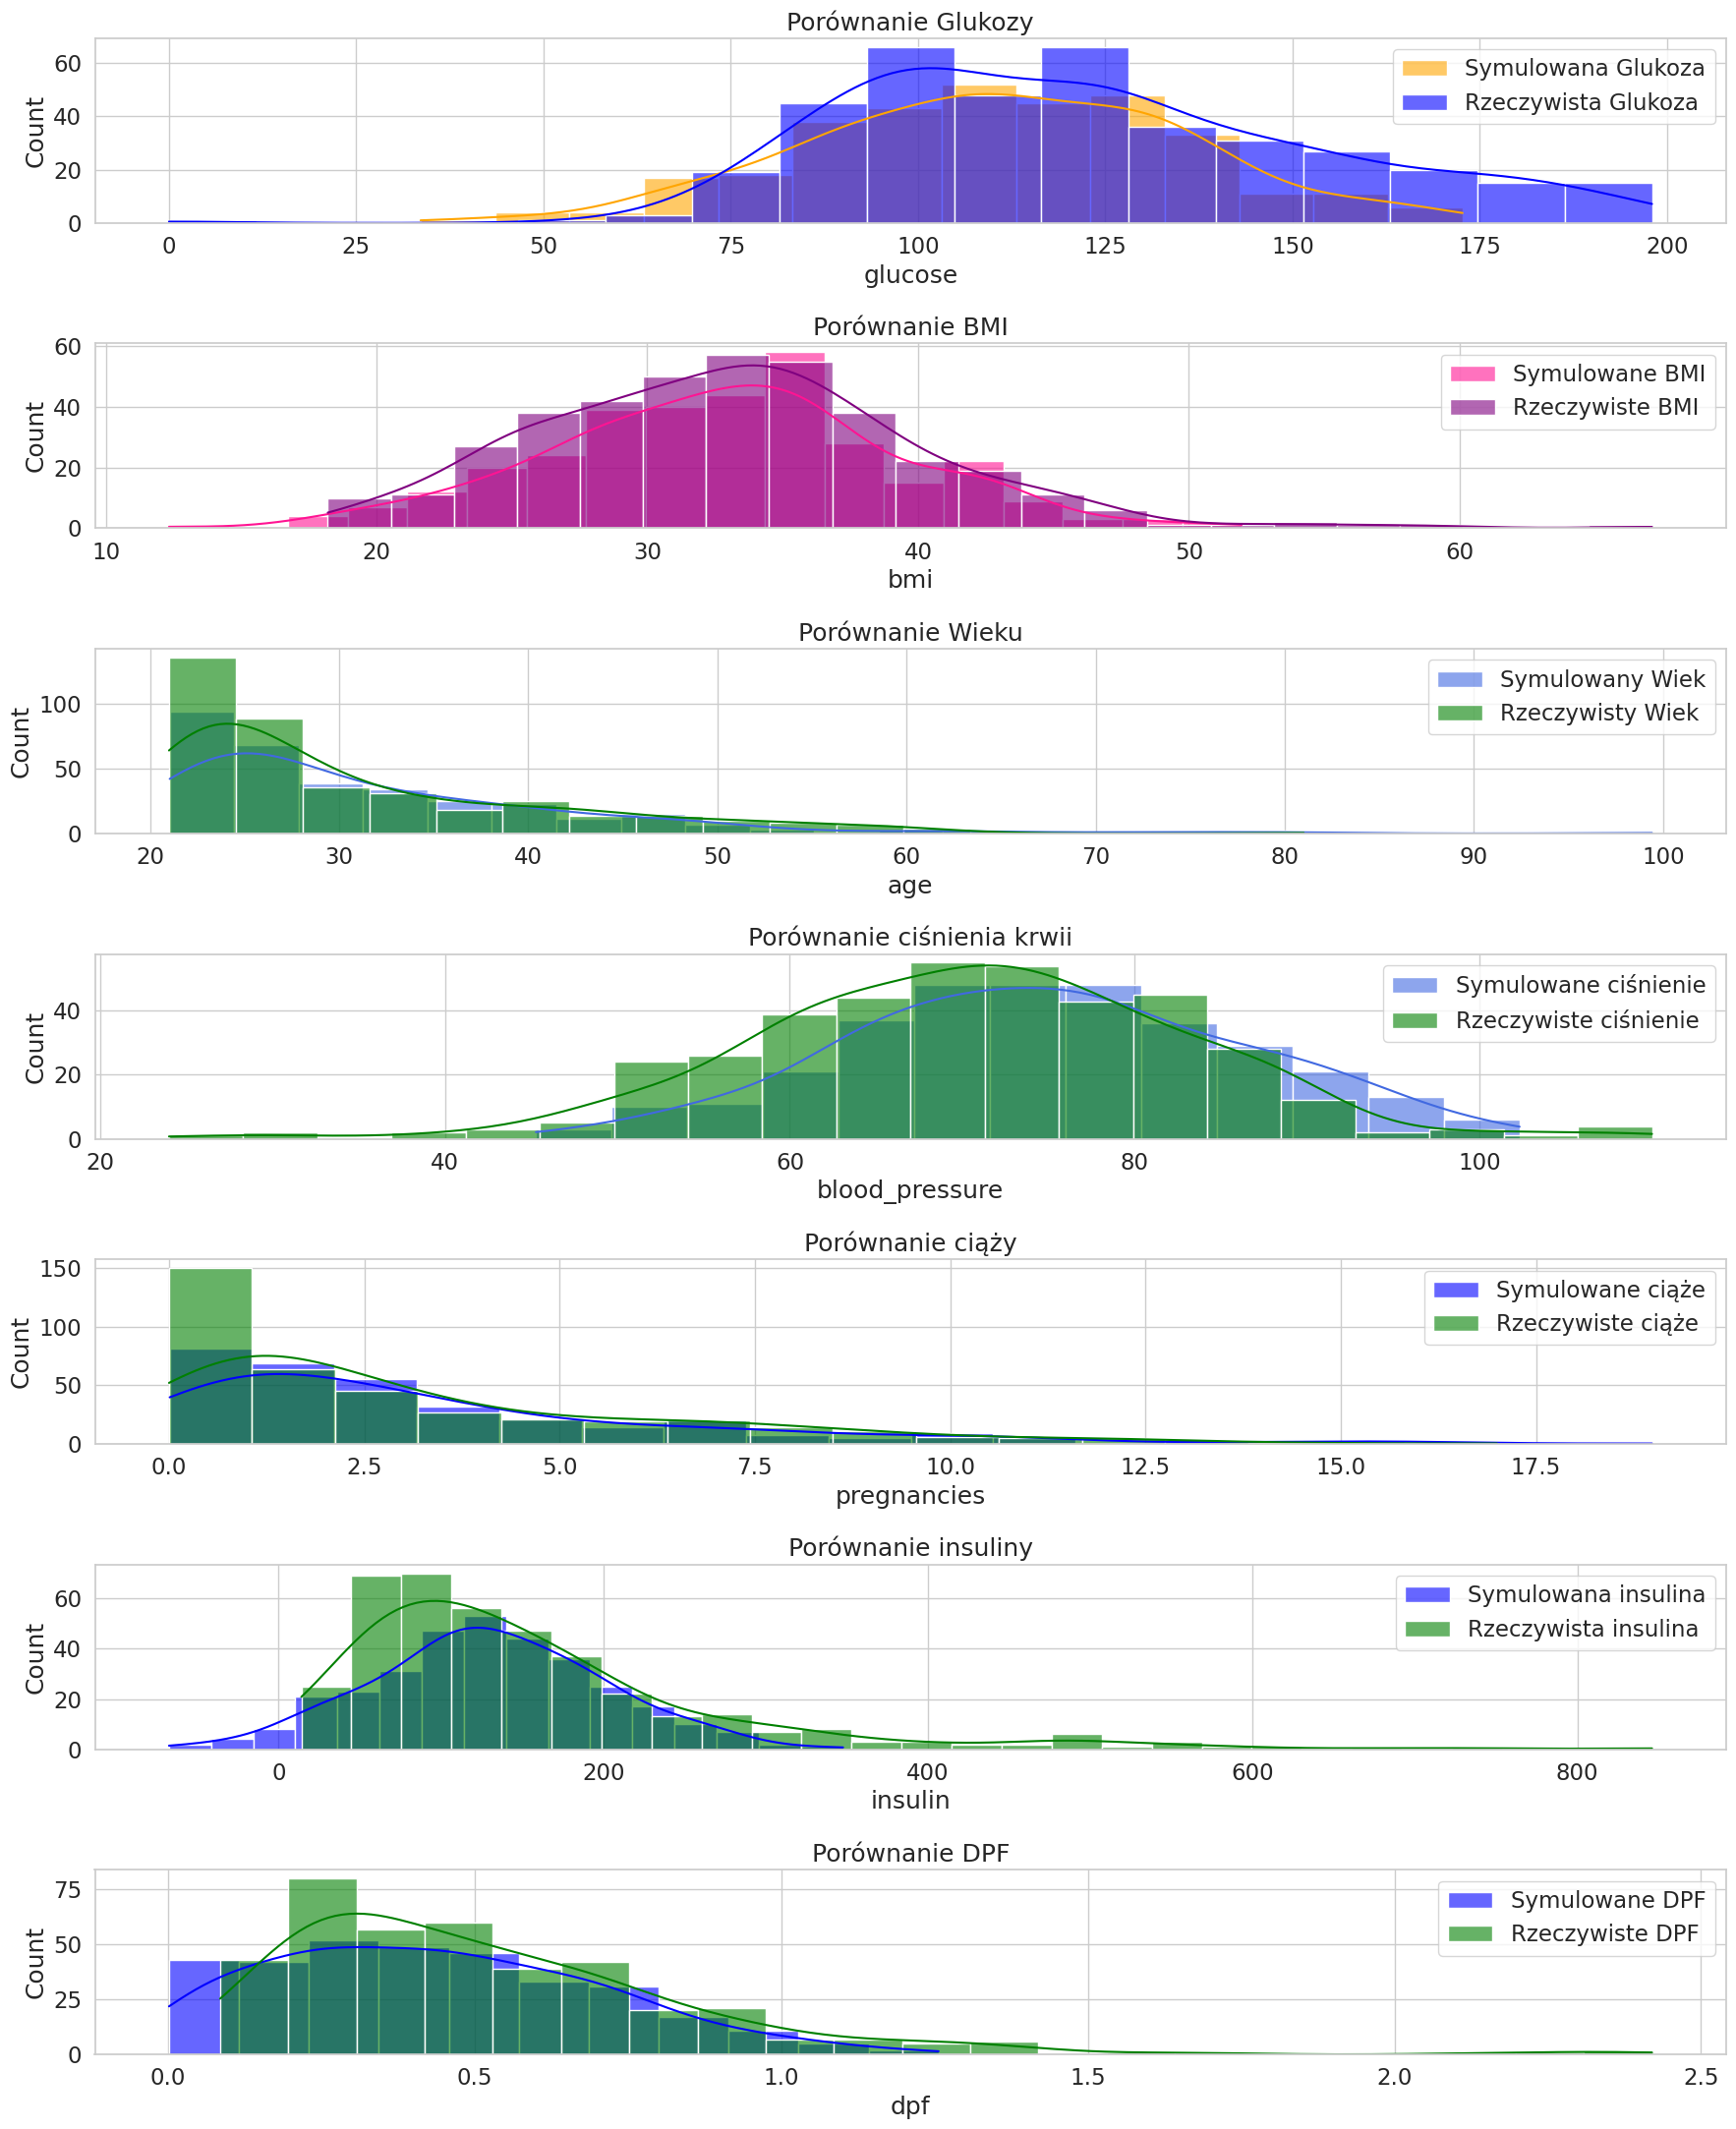

In [44]:
# Ustawienie stylu Seaborn dla lepszego wyglądu
sns.set(style='whitegrid', font_scale=1.5)

# Tworzenie figury i osi dla trzech wykresów
fig, axs = plt.subplots(7, 1, figsize=(18, 22))  # Trzy wykresy jeden pod drugim

# Glukoza
sns.histplot(data=whot, x='glucose', kde=True, color='orange', ax=axs[0], label='Symulowana Glukoza', alpha=0.6)
sns.histplot(data=pima, x='Glucose', kde=True, color='blue', ax=axs[0], label='Rzeczywista Glukoza', alpha=0.6)
axs[0].set_title('Porównanie Glukozy')
axs[0].legend()

# BMI
sns.histplot(data=whot, x='bmi', kde=True, color='deeppink', ax=axs[1], label='Symulowane BMI', alpha=0.6)
sns.histplot(data=pima, x='BMI', kde=True, color='purple', ax=axs[1], label='Rzeczywiste BMI', alpha=0.6)
axs[1].set_title('Porównanie BMI')
axs[1].legend()

# Wiek
sns.histplot(data=whot, x='age', kde=True, color='royalblue', ax=axs[2], label='Symulowany Wiek', alpha=0.6)
sns.histplot(data=pima, x='Age', kde=True, color='green', ax=axs[2], label='Rzeczywisty Wiek', alpha=0.6)
axs[2].set_title('Porównanie Wieku')
axs[2].legend()

# Ciśnienie krwii
sns.histplot(data=whot, x='blood_pressure', kde=True, color='royalblue', ax=axs[3], label='Symulowane ciśnienie', alpha=0.6)
sns.histplot(data=pima, x='BloodPressure', kde=True, color='green', ax=axs[3], label='Rzeczywiste ciśnienie', alpha=0.6)
axs[3].set_title('Porównanie ciśnienia krwii')
axs[3].legend()


# Ciąże
sns.histplot(data=whot, x='pregnancies', kde=True, color='blue', ax=axs[4], label='Symulowane ciąże', alpha=0.6)
sns.histplot(data=pima, x='Pregnancies', kde=True, color='green', ax=axs[4], label='Rzeczywiste ciąże', alpha=0.6)
axs[4].set_title('Porównanie ciąży')
axs[4].legend()

# Insulin
sns.histplot(data=whot, x='insulin', kde=True, color='blue', ax=axs[5], label='Symulowana insulina', alpha=0.6)
sns.histplot(data=pima, x='Insulin', kde=True, color='green', ax=axs[5], label='Rzeczywista insulina', alpha=0.6)
axs[5].set_title('Porównanie insuliny')
axs[5].legend()

sns.histplot(data=whot, x='dpf', kde=True, color='blue', ax=axs[6], label='Symulowane DPF', alpha=0.6)
sns.histplot(data=pima, x='DiabetesPedigreeFunction', kde=True, color='green', ax=axs[6], label='Rzeczywiste DPF', alpha=0.6)
axs[6].set_title('Porównanie DPF')
axs[6].legend()

# Formatowanie ogólne
plt.tight_layout()
plt.show()